In [ ]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv(r'F:\Machine Learning\Projects\Chronic Kidney Disease/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.shape

(400, 26)

    1. Features:
    age - age
    bp - blood pressure
    sg - specific gravity
    al - albumin
    su - sugar
    rbc - red blood cells
    pc - pus cell
    pcc - pus cell clumps
    ba - bacteria
    bgr - blood glucose random
    bu - blood urea
    sc - serum creatinine
    sod - sodium
    pot - potassium
    hemo - haemoglobin
    pcv - packed cell volume
    wc - white blood cell count
    rc - red blood cell count
    htn - hypertension
    dm - diabetes mellitus
    cad - coronary artery disease
    appet - appetite
    pe - pedal edema
    ane - anemia
    classification - class

In [ ]:
### rename column names to make it more user-friendly

In [95]:
columns=pd.read_csv('F:\Machine Learning\Projects\Chronic Kidney Disease/data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']

In [96]:
columns

,cols,abb_col_names
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [99]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [100]:
df.columns=columns['abb_col_names'].values

In [101]:
df

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [102]:
df.dtypes

 id                           int64
 age                        float64
 blood pressure             float64
 specific gravity           float64
 albumin                    float64
 sugar                      float64
 red blood cells             object
 pus cell                    object
 pus cell clumps             object
 bacteria                    object
 blood glucose random       float64
 blood urea                 float64
 serum creatinine           float64
 sodium                     float64
 potassium                  float64
 haemoglobin                float64
 packed cell volume          object
 white blood cell count      object
 red blood cell count        object
 hypertension                object
 diabetes mellitus           object
 coronary artery disease     object
 appetite                    object
 pedal edema                 object
 anemia                      object
 class                       object
dtype: object

    As it can be seen, red_blood_cell_count, packed_cell_volume and white_blood_cell_count are object type. We need to 
    change to numerical dtype.

In [8]:
features=['red_blood_cell_count','packed_cell_volume','white_blood_cell_count']

In [9]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [10]:
for feature in features:
    convert_dtype(df,feature)

    Let's drop the id column. id column is seems to be an unique identifier for each row so we are dropping that it won't 
    help us to find any insights from the data

In [11]:
df.drop(["id"],axis=1,inplace=True) 

### Extract Numerical & Categorical Features

In [17]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [20]:
cat_col,num_col=extract_cat_num(df)

In [21]:
cat_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'classification']

In [22]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [ ]:
### total unique categories in our categorical features to check if any dirtiness in data or not

In [24]:
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values 


pus_cell has ['normal' 'abnormal' nan] values 


pus_cell_clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


hypertension has ['yes' 'no' nan] values 


diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary_artery_disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal_edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


classification has ['ckd' 'ckd\t' 'notckd'] values 




In [ ]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

    So we need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [25]:
#Replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [26]:
for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red_blood_cells has [nan 'normal' 'abnormal'] values  


pus_cell has ['normal' 'abnormal' nan] values  


pus_cell_clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


hypertension has ['yes' 'no' nan] values  


diabetes_mellitus has ['yes' 'no' nan] values  


coronary_artery_disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal_edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


classification has ['ckd' 'notckd'] values  




    Looks good now apart from the NaNs

In [27]:
len(num_col)

14

###  Checking features distribution

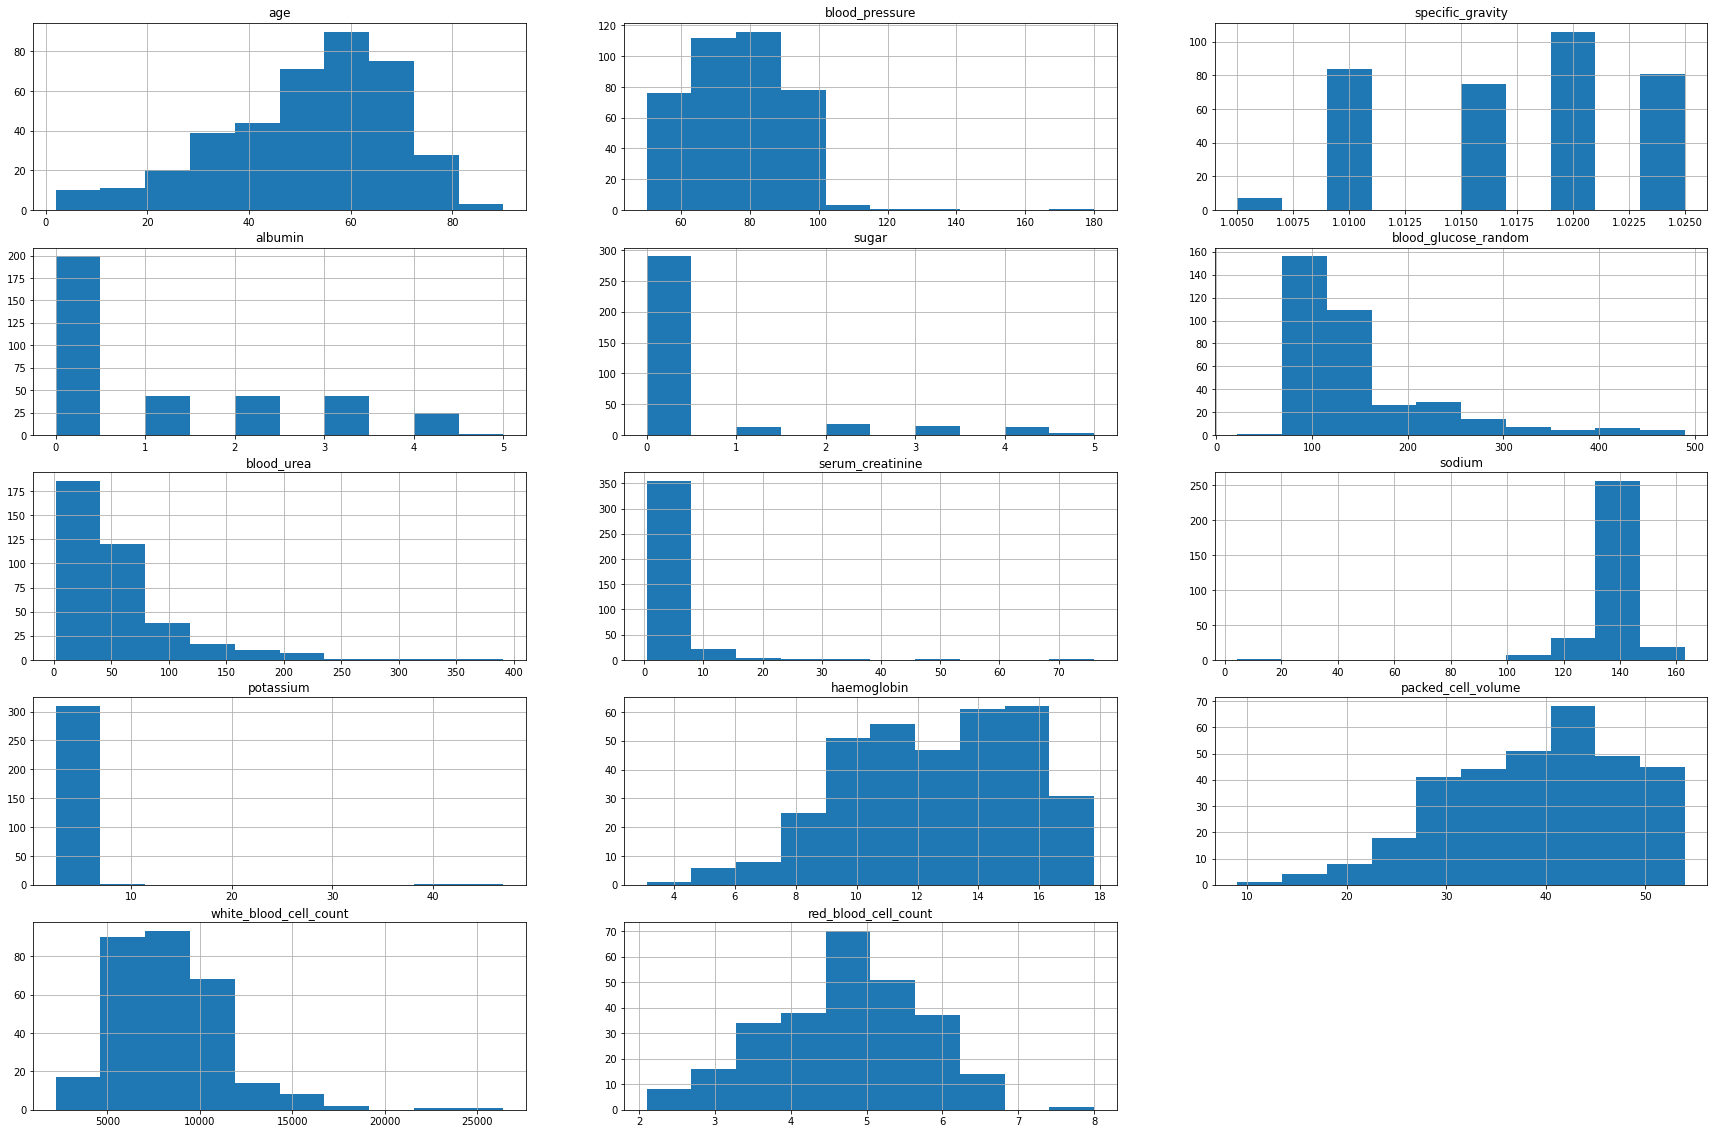

In [18]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)

    Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

### Now, let's check the label distribution for categorical data

In [33]:
len(cat_col)

11

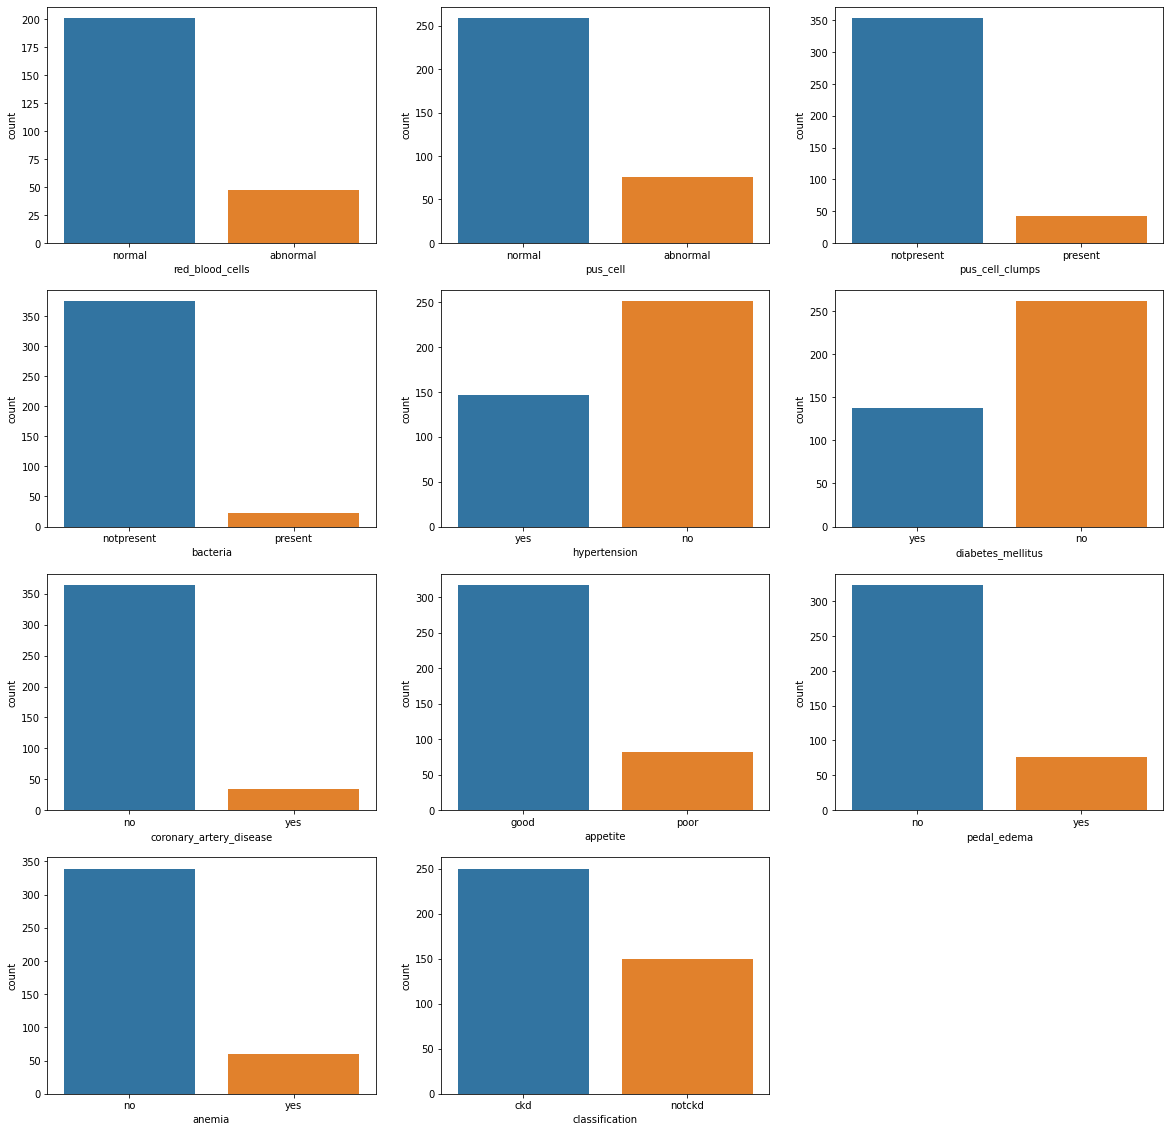

In [20]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])
    

    A few features have imbalanced categories. Stratified folds will be necessary while cross validation.

Text(0.5, 1.0, 'target Class')

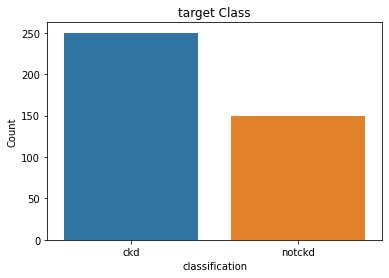

In [21]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")

In [22]:
## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

###  7. Correlations

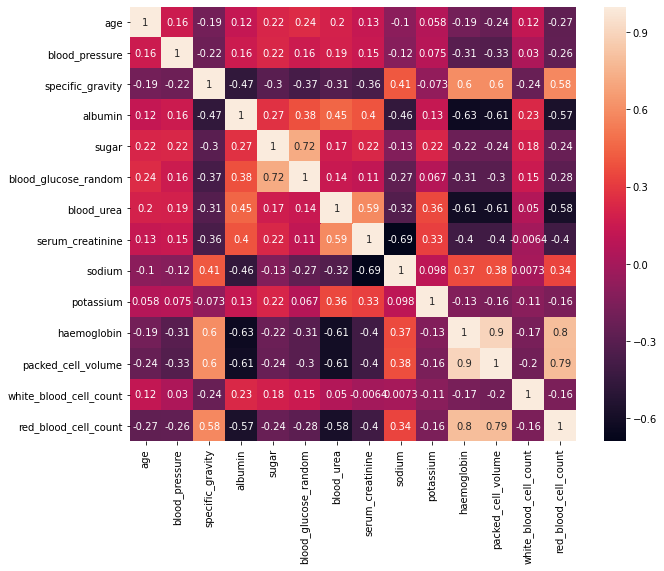

In [23]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

    Positive Correlation:
    
    Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Hemoglobin -> Red Blood cell count <- packed cell volume
    
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
    Serum creatinine -> Sodium

In [48]:
df.groupby(['red_blood_cells','classification'])['red_blood_cell_count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red_blood_cells classification                                   
abnormal        ckd                25  3.832000     3.7  2.5  5.6
normal          ckd                40  3.782500     3.8  2.1  8.0
                notckd            134  5.368657     5.3  4.4  6.5

### Let's check for Positive correlation and its impact on classes¶

In [24]:
import plotly.express as px

In [ ]:
px.violin(df,y='red_blood_cell_count',x="classification", color="classification")

In [ ]:
## find relationship between haemoglobin & packed cell volume
px.scatter(df,'haemoglobin','packed_cell_volume')

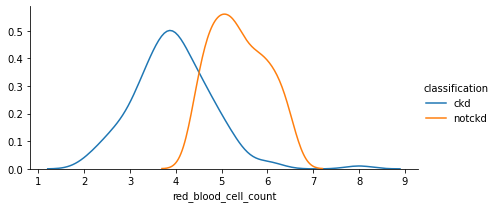

In [42]:
### analysing distribution of 'red_blood_cell_count' in both Labels 

grid=sns.FacetGrid(df, hue="classification",aspect=2)
grid.map(sns.kdeplot, 'red_blood_cell_count')
grid.add_legend()

    Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

In [25]:
# Defining violin and scatter plot & kde_plot functions
def violin(col):
    fig = px.violin(df, y=col, x="classification", color="classification", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(df, x=col1, y=col2, color="classification")
    return fig.show()

In [44]:
def kde_plot(feature):
    grid = sns.FacetGrid(df, hue="classification",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

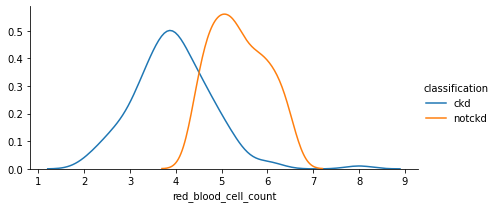

In [45]:
kde_plot('red_blood_cell_count')

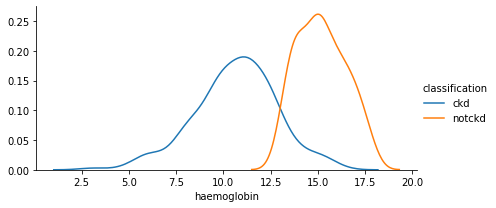

In [47]:
kde_plot('haemoglobin')

In [ ]:
scatters('red_blood_cell_count', 'packed_cell_volume')

In [ ]:
scatters('red_blood_cell_count', 'haemoglobin')

In [ ]:
scatters('haemoglobin','packed_cell_volume')

    1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
    disease(i.e ckd).
    2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
    disease(i.e nockd).

In [ ]:
violin('red_blood_cell_count')

In [ ]:
violin('packed_cell_volume')

###  Now let's check for negative correlation and its impact on classes

    Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [ ]:
scatters('red_blood_cell_count','albumin')

    Clearly, albumin levels of above 0 affect ckd largely

In [ ]:
scatters('packed_cell_volume','blood_urea')

    Packed cell volume >= 40 largely affects to be non ckd

In [ ]:
fig = px.bar(df, x="specific_gravity", y="packed_cell_volume",
             color='classification', barmode='group',
             height=400)
fig.show()

    Clearly, specific gravity >=1.02 affects non ckd

In [34]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [35]:
df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
anemia                       1
appetite                     1
pedal_edema                  1
classification               0
dtype: int64

In [36]:
cat_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'classification']

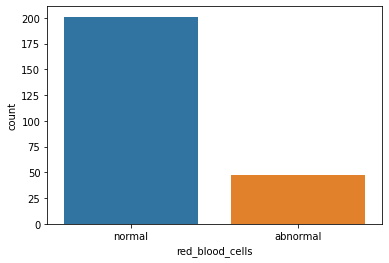

In [37]:
sns.countplot(df['red_blood_cells'])

In [28]:
data=df.copy()

In [ ]:
### filling missing with Random value

#### Random Value Imputation

In [29]:
data['red_blood_cells'].isnull().sum()

152

In [30]:
data['red_blood_cells'].dropna().sample()

29    abnormal
Name: red_blood_cells, dtype: object

In [31]:
random_sample=data['red_blood_cells'].dropna().sample(data['red_blood_cells'].isnull().sum())
random_sample

103      normal
355      normal
287      normal
84       normal
147      normal
         ...   
195    abnormal
36       normal
246    abnormal
289      normal
276      normal
Name: red_blood_cells, Length: 152, dtype: object

In [32]:
random_sample.index

Int64Index([103, 355, 287,  84, 147, 161, 339, 360, 234, 250,
            ...
            323, 271, 127, 301, 358, 195,  36, 246, 289, 276],
           dtype='int64', length=152)

In [33]:
data[data['red_blood_cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [34]:
random_sample.index=data[data['red_blood_cells'].isnull()].index

In [35]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [36]:
random_sample

0        normal
1        normal
5        normal
6        normal
10       normal
         ...   
309    abnormal
322      normal
349    abnormal
350      normal
381      normal
Name: red_blood_cells, Length: 152, dtype: object

In [37]:
data.loc[data['red_blood_cells'].isnull(),'red_blood_cells']=random_sample

In [38]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


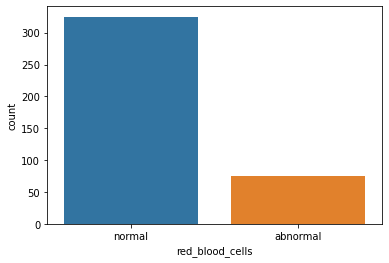

In [39]:
sns.countplot(data['red_blood_cells'])

In [40]:
data['red_blood_cells'].value_counts()/len(data)

normal      0.8125
abnormal    0.1875
Name: red_blood_cells, dtype: float64

In [41]:
len(df[df['red_blood_cells']=='normal'])/248

0.8104838709677419

In [42]:
len(df[df['red_blood_cells']=='abnormal'])/248

0.18951612903225806

In [43]:
### lets create a function so that I can easily do it for all features
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample



In [44]:
Random_value_imputation('pus_cell')
Random_value_imputation('red_blood_cells')

In [45]:
data[cat_col].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            4
bacteria                   4
hypertension               2
diabetes_mellitus          2
coronary_artery_disease    2
appetite                   1
pedal_edema                1
anemia                     1
classification             0
dtype: int64

In [58]:
### as rest of the features has less missing values,so I can fill it using mode concept

In [47]:
mode=data['pus_cell_clumps'].mode()[0]
mode

'notpresent'

In [48]:

data['pus_cell_clumps']=data['pus_cell_clumps'].fillna(mode)

In [49]:
def impute_mode(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)

In [50]:
for col in cat_col:
    impute_mode(col)

In [51]:
data[cat_col].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [52]:
data[num_col].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [ ]:
### lets fill missing values in Numerical features using Random value Imputation

In [53]:
for col in num_col:
    Random_value_imputation(col)

In [54]:
data[num_col].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

### feature Encoding

In [55]:
for col in cat_col:
    print('{} has {} categories'.format(col, data[col].nunique()))
    

red_blood_cells has 2 categories
pus_cell has 2 categories
pus_cell_clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes_mellitus has 2 categories
coronary_artery_disease has 2 categories
appetite has 2 categories
pedal_edema has 2 categories
anemia has 2 categories
classification has 2 categories


In [ ]:
#### as we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

In [58]:
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [59]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,162.0,...,38.0,6000.0,6.5,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


### Feature Importance

In [ ]:
#All the feature selection class are present in this Feature_selection module itself
#SelectKBest-to select k best features

In [ ]:
#chi2-Internally this class is going to check that whether p-value is less than 0.05 or not
#based on that,it will actually order all the features

In [60]:
from sklearn.feature_selection import SelectKBest#Also known as Information Gain
from sklearn.feature_selection import chi2

In [61]:
ind_col=[col for col in data.columns if col!='classification']
dep_col='classification'

In [62]:
X=data[ind_col]
y=data[dep_col]

In [63]:
### Apply SelectKBest Algorithm
#syntax==>  SelectKBest(score_function=' ', k=)
#ordered_rank_features is a object of  SelectKBest class
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

In [64]:
ordered_feature

SelectKBest(k=20, score_func=<function chi2 at 0x000000CC962A6318>)

In [65]:
#To get scores(rank) of feature,what we can do we can use scores function
ordered_feature.scores_

array([1.17945994e+02, 8.35592629e+01, 5.41630831e-03, 2.27263374e+02,
       8.73813333e+01, 8.96020513e+00, 1.64883117e+01, 2.52000000e+01,
       1.32000000e+01, 2.43634362e+03, 2.34184387e+03, 3.52854746e+02,
       3.56906940e+01, 7.78795194e-01, 1.27757030e+02, 3.28950256e+02,
       1.31694336e+04, 2.24950376e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [66]:
datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
datascores

,Score
0,117.945994
1,83.559263
2,0.005416
3,227.263374
4,87.381333
5,8.960205
6,16.488312
7,25.200000
8,13.200000
9,2436.343616


In [67]:
dfcolumns=pd.DataFrame(X.columns)
dfcolumns

,0
0,age
1,blood_pressure
2,specific_gravity
3,albumin
4,sugar
5,red_blood_cells
6,pus_cell
7,pus_cell_clumps
8,bacteria
9,blood_glucose_random


In [68]:
features_rank=pd.concat([dfcolumns,datascores],axis=1)

In [69]:
features_rank

,0,Score
0,age,117.945994
1,blood_pressure,83.559263
2,specific_gravity,0.005416
3,albumin,227.263374
4,sugar,87.381333
5,red_blood_cells,8.960205
6,pus_cell,16.488312
7,pus_cell_clumps,25.200000
8,bacteria,13.200000
9,blood_glucose_random,2436.343616


In [ ]:
#Higher the score is,more important feature is 

In [70]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,age,117.945994
1,blood_pressure,83.559263
2,specific_gravity,0.005416
3,albumin,227.263374
4,sugar,87.381333
5,red_blood_cells,8.960205
6,pus_cell,16.488312
7,pus_cell_clumps,25.200000
8,bacteria,13.200000
9,blood_glucose_random,2436.343616


In [71]:
#fetch largest 10 values of Score column
features_rank.nlargest(10,'Score')

,Features,Score
16,white_blood_cell_count,13169.433634
9,blood_glucose_random,2436.343616
10,blood_urea,2341.843872
11,serum_creatinine,352.854746
15,packed_cell_volume,328.950256
3,albumin,227.263374
14,haemoglobin,127.757030
0,age,117.945994
18,hypertension,88.200000
4,sugar,87.381333


In [72]:
selected_columns=features_rank.nlargest(10,'Score')['Features'].values

In [73]:
X_new=data[selected_columns]

### Model Building

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size=0.75)

In [75]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)


In [76]:
## check whether dataset is imbalance or not
y_train.value_counts()

0    184
1    116
Name: classification, dtype: int64

In [ ]:
### Lets find best model using Hyperparameter optimization

In [77]:
from xgboost import XGBClassifier
XGBClassifier()

In [215]:
## Hyper Parameter Optimization with respect to XGBoost

params={
 "learning_rate"    : [0.05, 0.20, 0.25 ] ,
 "max_depth"        : [ 5, 8, 10, 12],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.7 ]
    
}

In [216]:
from sklearn.model_selection import RandomizedSearchCV

In [217]:
from xgboost import XGBClassifier
classifier=XGBClassifier()

In [218]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [219]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [220]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


[20:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    6.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           use_label_encoder=True,
                                           validate_parameters=None,
                                           v

In [221]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [222]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

In [223]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
## we have got this model on the basis of cross valudation & hyper-parameter optimization

In [224]:
classifier.fit(X_train,y_train)

[20:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [225]:
y_pred=classifier.predict(X_test)

In [226]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [227]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[58  3]
 [ 0 39]]


In [ ]:
### to make confusion matrix user-friendly
plt.imshow(confusion)

In [228]:
accuracy_score(y_test, y_pred)

0.97